# VI Project
### Import


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

### Source.

In [2]:
dataFrame = pd.read_csv('migration_population.csv')
#dataFrame.head()
    


### Info.

21389.1
14.384588158319183


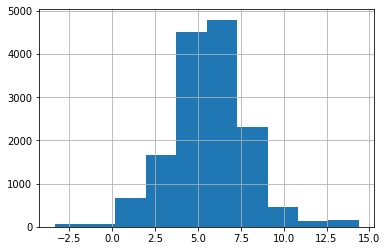

In [17]:
#max pop_density
print(dataFrame.pop_density.max())
#dataFrame.pop_density.hist(bins=[0, 10, 20, 40, 80, 160, 320, 640, 1280, 2560])
#dataFrame.pop_density.hist(bins=[0, 10, 20, 40, 80, 160, 320, 640, 1280])
np.log2(dataFrame.pop_density).hist()
print(np.log2(dataFrame.pop_density).max())

### Export as JSON [year][country (code iso2c)][rest of the data]

In [ ]:
jSstr = "{"
for i in dataFrame.year.unique():
    dataFrame_by_year = (dataFrame.loc[dataFrame['year'] == i]).drop(['year'], axis=1)[46:].set_index('iso2c')
    jSstr += "\"" + str(i) + "\":" + dataFrame_by_year.to_json(orient="index") + ","
jSstr = jSstr "}"
with open("Output.json", "w") as text_file:
    text_file.write(jSstr)   